In [1]:
import pandas as pd
from pathlib import Path


In [2]:
df = pd.read_csv("sample_data.csv", index_col=0)

In [3]:
df.head()

,experiment,plate_id,well,well_id,image_id,cell_line,condition,integrated_int_DAPI_norm,intensity_mean_EdU_nucleus_norm,cell_cycle_detailed,...,integrated_int_DAPI,intensity_max_H2AX_nucleus,intensity_min_H2AX_nucleus,intensity_mean_H2AX_nucleus,intensity_max_p21_nucleus,intensity_min_p21_nucleus,intensity_mean_p21_nucleus,intensity_max_EdU_nucleus,intensity_min_EdU_nucleus,intensity_mean_EdU_nucleus
0,16012024_MM_SIRNA_C16ORF72_HUWE1,1759,C5,29630,821779,U2OS,CCNA2,2.468387,0.928824,G1,...,9.969916e+05,9361.725628,5836.448849,7703.470504,4555.967154,4104.434275,4352.596234,474.597557,330.954467,68.428092
1,16012024_MM_SIRNA_C16ORF72_HUWE1,1759,A5,29619,821543,RPE-1,CCNA2,4.438000,0.971499,G2/M,...,1.289871e+06,5839.962821,4474.954677,5098.572313,4898.531210,4140.700536,4492.123775,497.860807,350.444340,71.714773
2,16012024_MM_SIRNA_C16ORF72_HUWE1,1759,C5,29630,821778,U2OS,CCNA2,5.740297,1.124410,Polyploid (non-replicating),...,2.318529e+06,6513.162663,4536.119695,5346.682028,8214.308934,4977.571116,6663.936505,559.978295,367.050281,82.837183
3,16012024_MM_SIRNA_C16ORF72_HUWE1,1759,B5,29634,821853,RPE-1,CCNA2,3.794690,20.703825,Late S,...,1.102898e+06,5948.220180,4631.035651,5320.130452,4847.095281,4233.252846,4504.014136,4094.180300,1044.364292,1528.329573
4,16012024_MM_SIRNA_C16ORF72_HUWE1,1759,A5,29619,821534,RPE-1,CCNA2,3.512435,10.895419,Late S,...,1.020863e+06,6071.344870,4488.800292,5200.823310,4598.933656,3971.044618,4229.690768,2321.102931,762.677033,804.285687


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12000 entries, 0 to 11999
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   experiment                       12000 non-null  object 
 1   plate_id                         12000 non-null  int64  
 2   well                             12000 non-null  object 
 3   well_id                          12000 non-null  int64  
 4   image_id                         12000 non-null  int64  
 5   cell_line                        12000 non-null  object 
 6   condition                        12000 non-null  object 
 7   integrated_int_DAPI_norm         12000 non-null  float64
 8   intensity_mean_EdU_nucleus_norm  12000 non-null  float64
 9   cell_cycle_detailed              12000 non-null  object 
 10  cell_cycle                       12000 non-null  object 
 11  label                            12000 non-null  int64  
 12  area_nucleus           

In [5]:
print(f"cell lines: {df['cell_line'].unique()}")
print(f"conditions: {df['condition'].unique()}")

cell lines: ['U2OS' 'RPE-1']
conditions: ['CCNA2' 'CDK4' 'NT' 'SCR 40nM']


In [6]:
# define a directory to save the plots using the poathlib module
OUTPUTDIR = Path.cwd() / 'ExampleFigures' # cwd is the current working directory
OUTPUTDIR.mkdir(exist_ok=True)  # make the directory if it doesn't exist

In [7]:
# define the conditiosn and their order that you want to analyse
conditions = ['NT', 'SCR 40nM', 'CCNA2', 'CDK4']

### Counting cells
I made a function in ifanalysis.counts called count_cells.
This takes the following parameters: 
- df dataframe from Omero-Screen to analyse 
- conditions list of conditions as defined in the previous cell
- ctr_cond='NT' define the condition that you want to use as reference
- title='your choice', the default is 'Cell Counts'
- path=OUTPUTDIR define where to save 


Saving figure Rel and Abs. Cell Counts


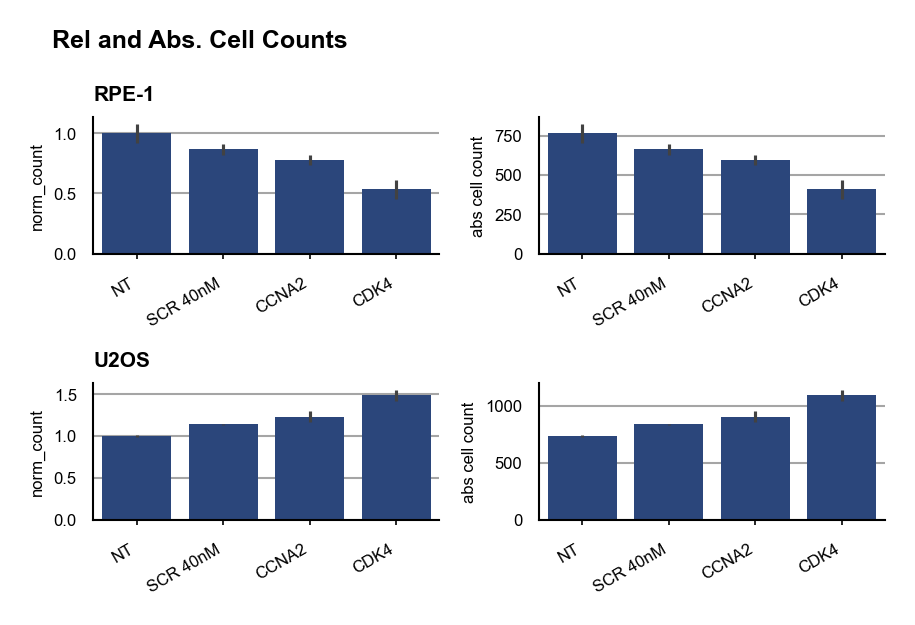

In [8]:
from ifanalysis import counts
counts.count_cells(df, conditions, ctr_cond='NT', title='Rel and Abs. Cell Counts', path=OUTPUTDIR)

### cellcycle analysis
I made a function called complot to produce the cell cycle plots for a group of conditiosn defined in the conditions list.
This functions takes the following parameters:
- df, the dataframe has to be normalised and analysed for cell cycle phases. USe the _cc data from Omero_screen
- conditions
- cell_line = string for given cell line
- tite_str = string for title
- cell_number (optional) = reduce the number of cells to a given value. (if excluded all cells will be analysed)
- path = path to directory


Saving figure U2OS CombPlot Cell Cycle Analysis
Saving figure RPE-1 CombPlot Cell Cycle Analysis


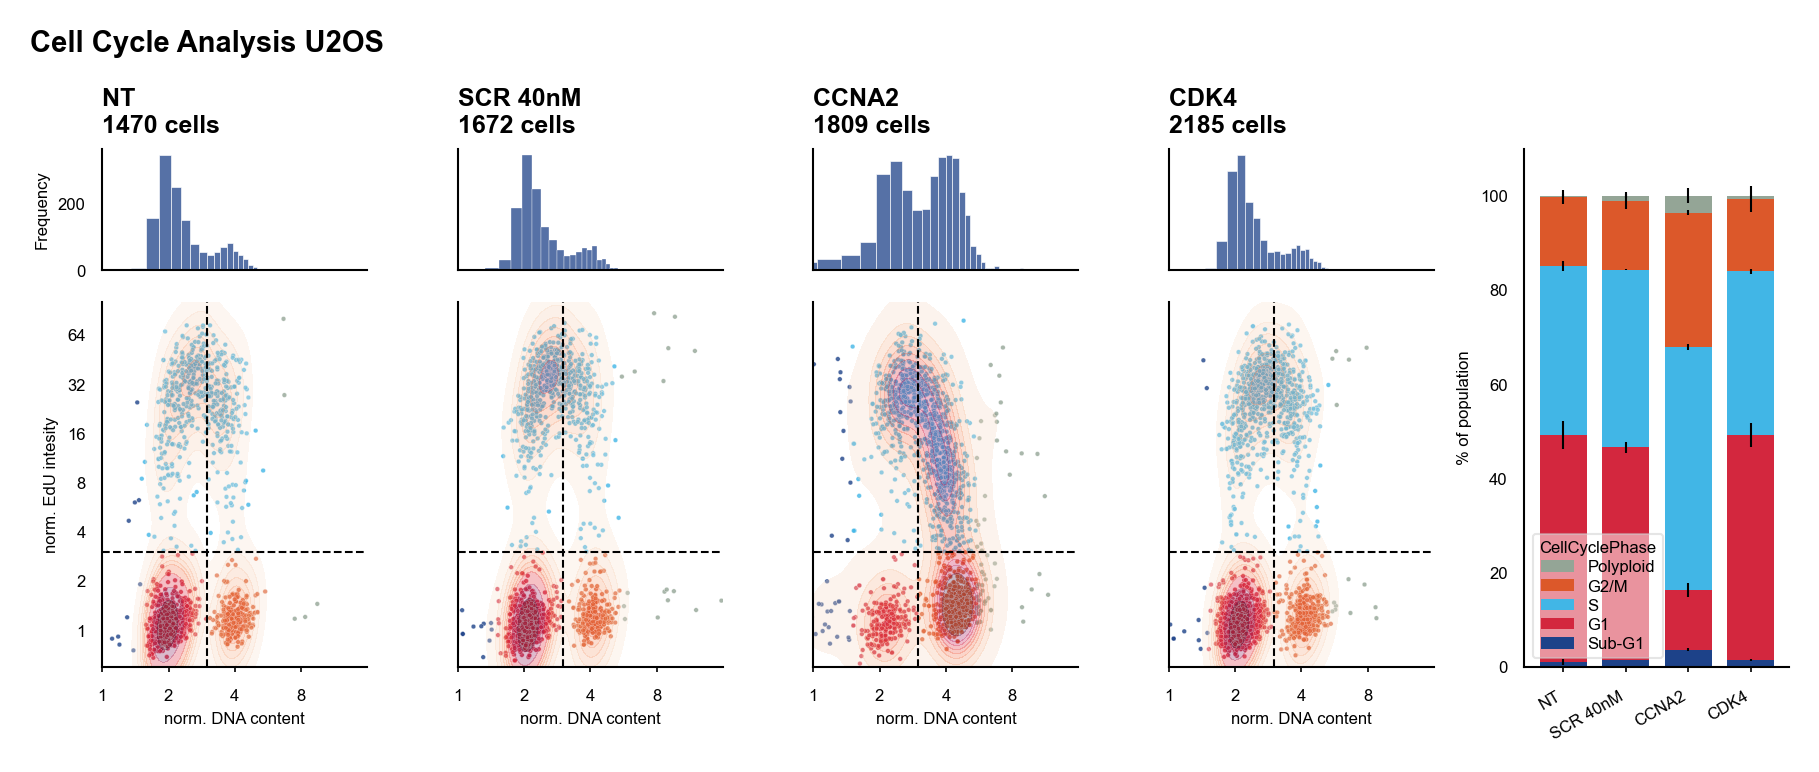

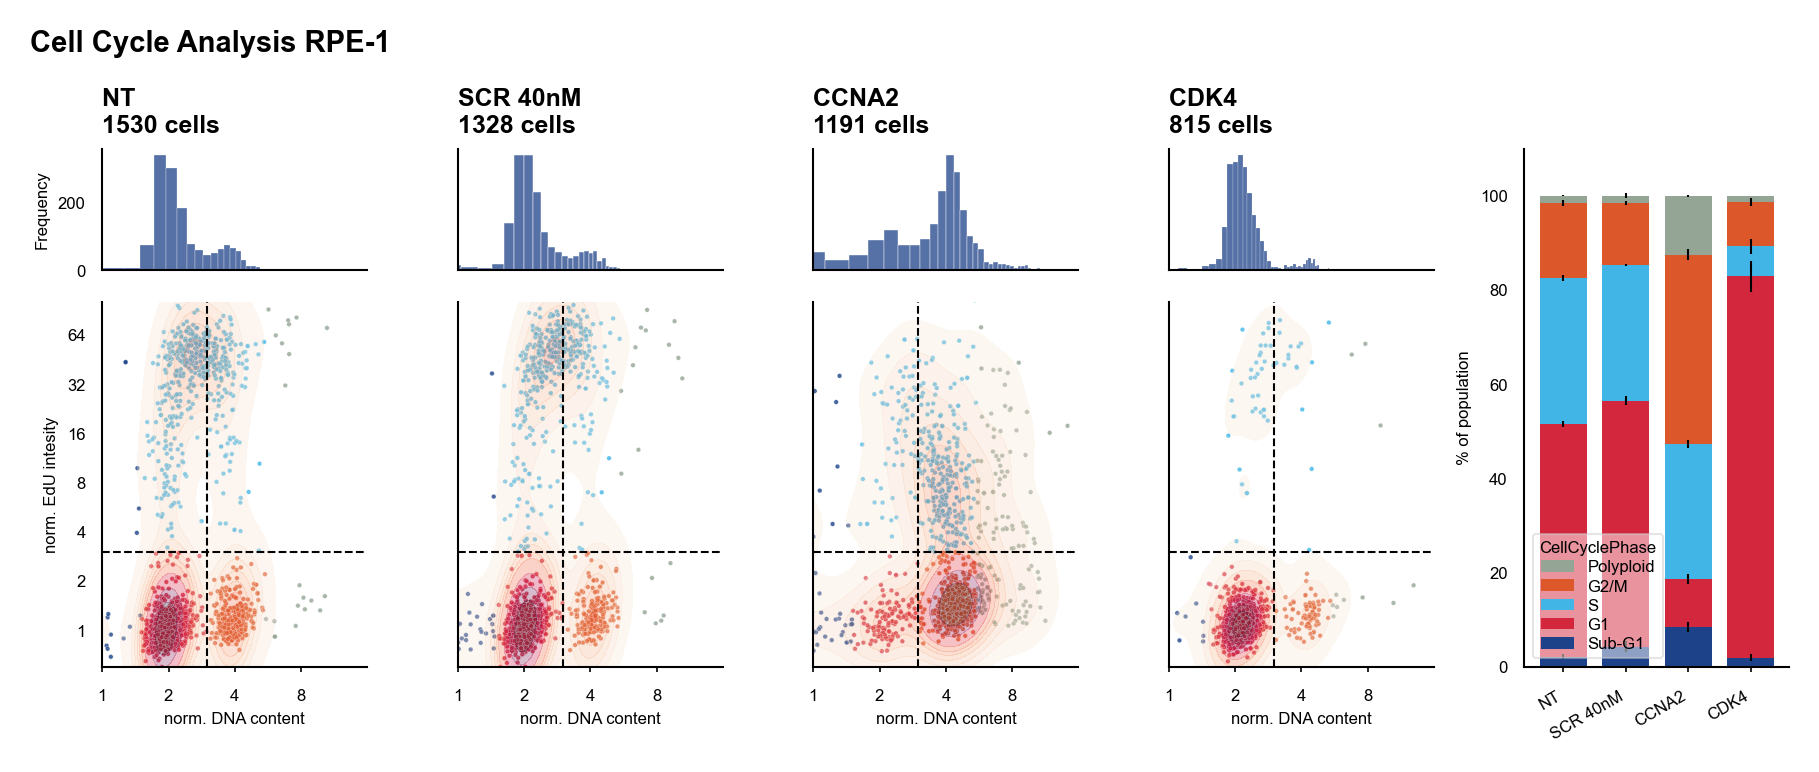

In [9]:
from ifanalysis import combplot
for cell_line in df.cell_line.unique():
        combplot.combplot(df, conditions, cell_line=cell_line, title_str='Cell Cycle Analysis', cell_number=5000, path=OUTPUTDIR)


### analysing distributions of numerical columns (eg p21 instenity, or cell size)
This functions takes the following parameters:
- df, the dataframe has to be normalised and analysed for cell cycle phases. USe the _cc data from Omero_screen
- conditions
- cell_line = string for given cell line
- name of column to plot
- label to be used for the y-axis
- cell_number (optional) = reduce the number of cells to a given value. (if excluded all cells will be analysed)
- path = path to directory

Saving figure intensity_mean_H2AX_nucleus, U2OS
Saving figure intensity_mean_H2AX_nucleus, RPE-1


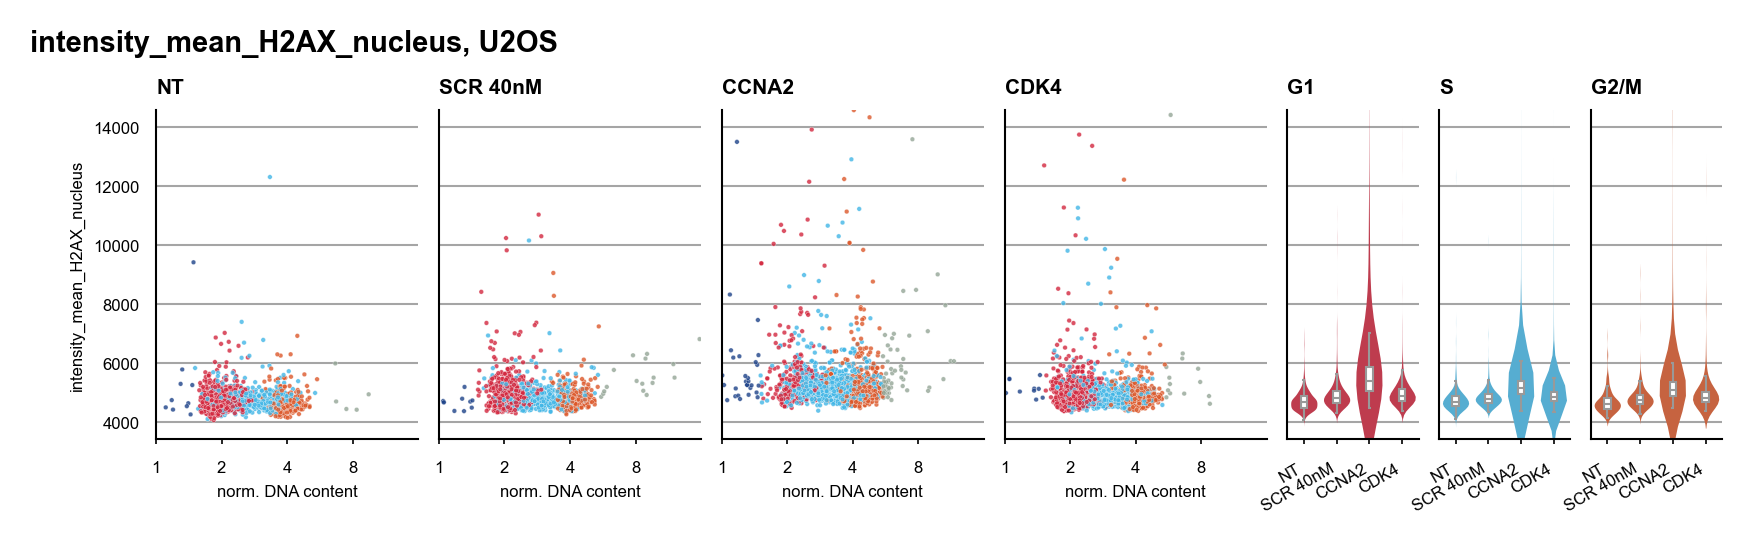

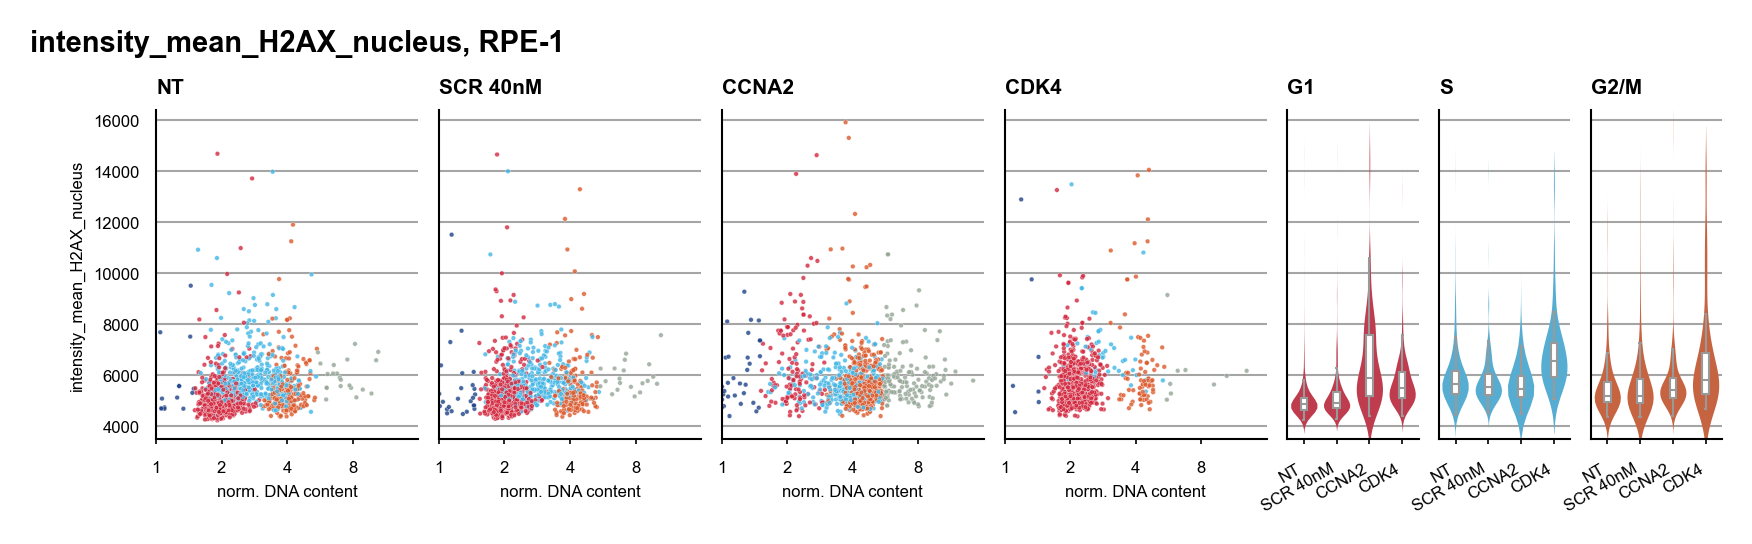

In [10]:
from ifanalysis import intensity
for cell_line in df.cell_line.unique():
    intensity.int_combplot(df, conditions, cell_line, 'intensity_mean_H2AX_nucleus', 'H2AX', cellnumber=3000, path=OUTPUTDIR)